# Ejemplos de Tranformadas de Fourier

![](tabla2.png)

In [1]:
# Importar librerias basicas
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import integrate, I

%matplotlib inline
plt.style.use('bmh') # estilo de las graficas
from IPython.display import Latex # para visualizar ecuaciones en jupyter

In [2]:
sym.init_printing()

t, w = sym.symbols('t omega', real=True)
a = sym.symbols('a')

def fourier_transform(x):
    return sym.transforms._fourier_transform(x, t, w, 1, -1, 'Fourier')

### 1. Transformada de Fourier Exponencial decreciente

$\large f(t) = e^{-at} \mu (t)$

para $a = 1$

### Probemos primero la Función Heaviside y e^t


/home/melii/.local/lib/python3.7/site-packages/sympy/plotting/plot.py:1065: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['left'].set_smart_bounds(True)
/home/melii/.local/lib/python3.7/site-packages/sympy/plotting/plot.py:1066: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['bottom'].set_smart_bounds(False)


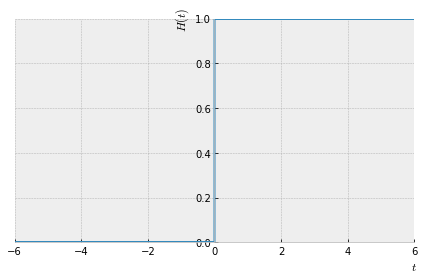

In [3]:
sym.plot(sym.Heaviside(t), (t, -6, 6), xlabel=r'$t$', ylabel=r'$H(t)$')

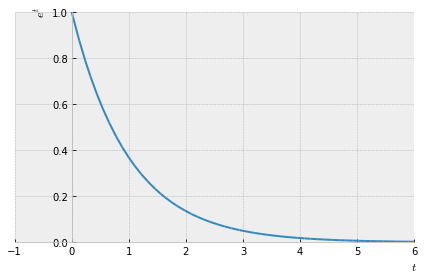

In [4]:
sym.plot(sym.exp(-t), (t, -1, 6), xlabel=r'$t$', ylabel=r'$e^t$')

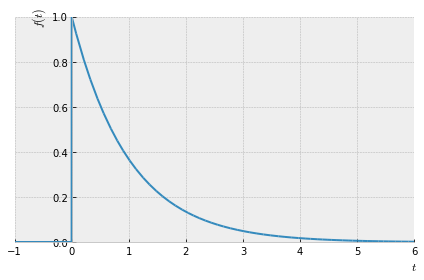

In [5]:
a = sym.exp(-t)*sym.Heaviside(t)
sym.plot(a, (t, -1, 6), xlabel=r'$t$', ylabel=r'$f(t)$')

In [6]:
FW = fourier_transform(sym.exp(-t)*sym.Heaviside(t))
FW

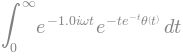

In [7]:
fw2 = integrate(sym.exp(-a*t - 1j*w*t) , (t,0, sym.oo))
fw2


### Gráfica de | F (W) |


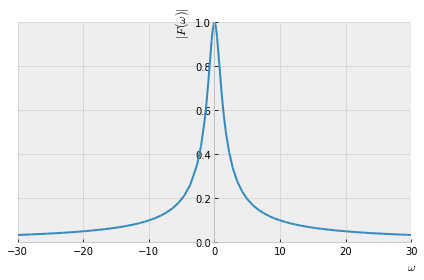

In [8]:
sym.plot(sym.Abs(FW), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')

### Gráfica de W


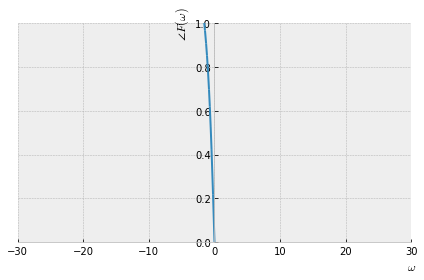

In [9]:
sym.plot(sym.arg(FW), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$\angle F(\omega)$')

### 2. Transformada de Fourier para

$\large f(t) = te^{-at} \mu (t)$

para $a = 1$

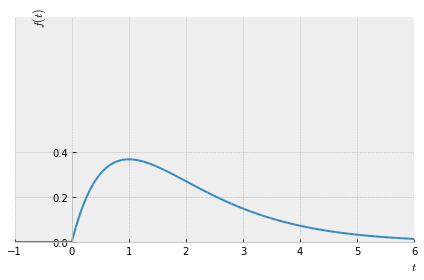

In [10]:
transF2 = t*sym.exp(-t)*sym.Heaviside(t)
sym.plot(transF2, (t, -1, 6), xlabel=r'$t$', ylabel=r'$f(t)$')

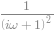

In [11]:
FW2 = fourier_transform(transF2)
FW2

### Gráfica de |F (W)|

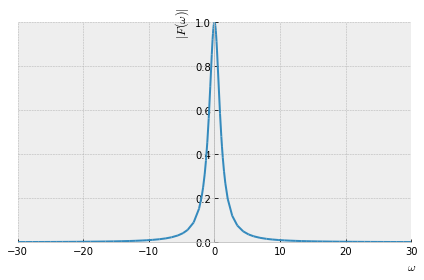

In [12]:
sym.plot(sym.Abs(FW2), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')

### Gráfica de Omega

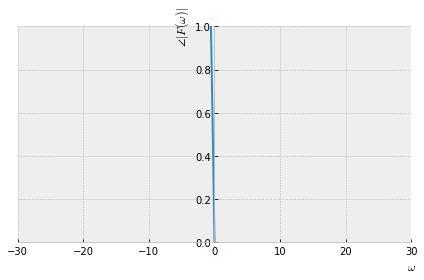

In [13]:
sym.plot(sym.arg(FW2), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$\angle|F(\omega)|$')

### 3. Transformada de Fourier para

$\large f(t) = |t|, F(w)= -2/w^2$


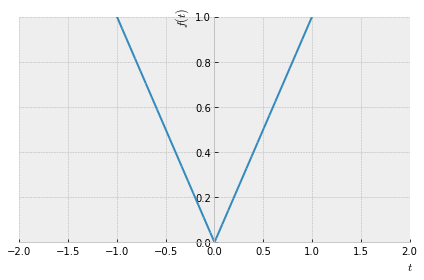

In [18]:
transFAbs = sym.Abs(t)
sym.plot(transFAbs, (t, -2, 2), xlabel=r'$t$', ylabel=r'$f(t)$')

In [15]:
# FWAbs = fourier_transform(transFAbs) No es posible obtener la transformada de esta forma


In [93]:
FW3 = sym.integrate(sym.Abs(t)*sym.exp(-sym.I*w*t), (t, -sym.oo, sym.oo))
FW3

⎧       -2              │         π│   π   │         π│   π
⎪       ───         for │arg(ω) - ─│ < ─ ∧ │arg(ω) + ─│ < ─
⎪         2             │         2│   2   │         2│   2
⎪        ω                                                 
⎪                                                          
⎨∞                                                         
⎪⌠                                                         
⎪⎮   -ⅈ⋅ω⋅t                                                
⎪⎮  ℯ      ⋅│t│ dt                 otherwise               
⎪⌡                                                         
⎩-∞                                                        

In [94]:
FW3 = fourier_transform(sym.Abs(t))
FW3

IntegralTransformError: Fourier Transform could not be computed: function not integrable on real axis.

In [ ]:
sym.plot(sym.Abs(FWAbs), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')


### 4. Transformada de Fourier: Delta de Dirac

La transformación  $\mathcal{F} \{ \delta(t) \}$ del impulso de Dirac se deriva al introducir $\delta(t)$ en La definición de la transformada de Fourier y la explotación de la propiedad de integracion de la función delta de Dirac.

$$
\mathcal{F} \{ \delta(t) \} = \int_{-\infty}^{\infty} \delta(t) \, e^{-j \omega t} dt = 1
$$

In [96]:
t, w = sym.symbols('t omega', real=True)
w0 = sym.symbols('omega0', real=True)

FWDelta = sym.integrate(sym.DiracDelta(t)*sym.exp(-I*w*t), (t, -sym.oo, sym.oo))
sym.pprint(FWDelta)

1


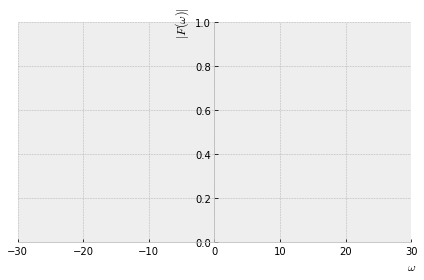

In [97]:
sym.plot(sym.Abs(FWDelta), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$',adaptive=False)

### 5. Transformada de Fourier: 1


$$
\mathcal{F} \{ \delta(t) \} = \int_{-\infty}^{\infty} 1 \, e^{-j \omega t} dt = \frac {1 - e^-j2\pi}{e^- \frac {j\pi}{2}}
$$

In [78]:
FW5 = sym.integrate(1 *sym.exp(-I*w*t), (t, -sym.oo, sym.oo)) 
FW5

⎧                   │         π│   π   │         π│   π
⎪      0        for │arg(ω) - ─│ < ─ ∧ │arg(ω) + ─│ < ─
⎪                   │         2│   2   │         2│   2
⎪                                                      
⎪∞                                                     
⎨⌠                                                     
⎪⎮   -ⅈ⋅ω⋅t                                            
⎪⎮  ℯ       dt                 otherwise               
⎪⌡                                                     
⎪-∞                                                    
⎩                                                      

KeyboardInterrupt: 

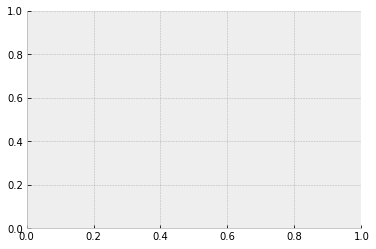

In [79]:
sym.plot(sym.Abs(FW5), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')

### 6. Transformada de Fourier: 



$$
\mathcal{F} \{ \delta(t) \} = \int_{-\infty}^{\infty} u(t) \, e^{-j \omega t} dt = \pi \delta (w)+ \frac {1}{jw}
$$

In [72]:
transF6 = sym.Heaviside(t)
FW6 = sym.integrate(transF6 *sym.exp(-I*w*t), (t, -sym.oo, sym.oo)) 
FW6

⎧       -ⅈ               │         π│   π
⎪       ───          for │arg(ω) + ─│ < ─
⎪        ω               │         2│   2
⎪                                        
⎪∞                                       
⎨⌠                                       
⎪⎮   -ⅈ⋅ω⋅t                              
⎪⎮  ℯ      ⋅θ(t) dt       otherwise      
⎪⌡                                       
⎪-∞                                      
⎩                                        

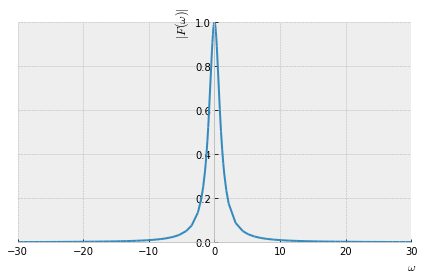

In [36]:
sym.plot(sym.Abs(FW6), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')

### 7. Transformada de Fourier: $ cos(w_0 t) u(t) $


$$
\mathcal{F} \{ \delta(t) \} = \int_{-\infty}^{\infty} \cos(w_0 t) u(t) \, e^{-j \omega t} dt = \frac {\pi}{2} [\delta (w -w_0) + \delta (w + w_0)] + \frac {jw}{w_0^2 - w^2}
$$

In [73]:
transF7 = sym.cos(w0*t) * sym.Heaviside(t)
FW7= sym.integrate(transF7 *sym.exp(-I*w*t), (t, -sym.oo, sym.oo)) 
FW7

⎧            ⅈ⋅ω                                                       
⎪      ───────────────         for 2⋅│arg(ω₀)│ = 0 ∧ │2⋅arg(ω) + π│ < π
⎪          ⎛    2    ⎞                                                 
⎪        2 ⎜   ω     ⎟                                                 
⎪      ω₀ ⋅⎜- ─── + 1⎟                                                 
⎪          ⎜    2    ⎟                                                 
⎪          ⎝  ω₀     ⎠                                                 
⎨                                                                      
⎪∞                                                                     
⎪⌠                                                                     
⎪⎮   -ⅈ⋅ω⋅t                                                            
⎪⎮  ℯ      ⋅cos(ω₀⋅t)⋅θ(t) dt                 otherwise                
⎪⌡                                                                     
⎪-∞                                                             

In [44]:
sym.plot(sym.Abs(FW7), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')

ValueError: The same variable should be used in all univariate expressions being plotted.

### 8. Transformada de Fourier: $ sen(w_0 t) u(t) $



$$
\mathcal{F} \{ \delta(t) \} = \int_{-\infty}^{\infty} \sin(w_0 t) u(t) \, e^{-j \omega t} dt = \frac {\pi}{2j} [\delta (w -w_0) + \delta (w + w_0)] + \frac {w_0}{w_0^2 - w^2}
$$

In [74]:
transF8 = sym.sin(w0*t) * sym.Heaviside(t)
FW8= sym.integrate(transF8 *sym.exp(-I*w*t), (t, -sym.oo, sym.oo)) 
FW8

⎧             1                                                        
⎪       ──────────────         for 2⋅│arg(ω₀)│ = 0 ∧ │2⋅arg(ω) + π│ < π
⎪          ⎛    2    ⎞                                                 
⎪          ⎜   ω     ⎟                                                 
⎪       ω₀⋅⎜- ─── + 1⎟                                                 
⎪          ⎜    2    ⎟                                                 
⎪          ⎝  ω₀     ⎠                                                 
⎨                                                                      
⎪∞                                                                     
⎪⌠                                                                     
⎪⎮   -ⅈ⋅ω⋅t                                                            
⎪⎮  ℯ      ⋅sin(ω₀⋅t)⋅θ(t) dt                 otherwise                
⎪⌡                                                                     
⎪-∞                                                             

In [47]:
sym.plot(sym.Abs(FW8), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')

NameError: name 'FW8' is not defined

### 9. Transformada de Fourier: $ cos(w_0 t)  $



$$
\mathcal{F} \{ \delta(t) \} = \int_{-\infty}^{\infty} \cos(w_0 t) \, e^{-j \omega t} dt = \pi[\delta (w -w_0) + \delta (w + w_0)] 
$$

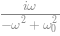

In [39]:
transF7 = sym.cos(w0*t) * sym.Heaviside(t)
FW7= fourier_transform(transF7)
FW7

In [44]:
sym.plot(sym.Abs(FW7), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')

ValueError: The same variable should be used in all univariate expressions being plotted.

### 10. Transformada de Fourier: $ sin(w_0 t)  $



$$
\mathcal{F} \{ \delta(t) \} = \int_{-\infty}^{\infty} \sin(w_0 t) \, e^{-j \omega t} dt = \pi j[\delta (w -w_0) - \delta (w + w_0)] 
$$

In [75]:
transF7 = sym.cos(w0*t) * sym.Heaviside(t)
FW7= sym.integrate(transF7 *sym.exp(-I*w*t), (t, -sym.oo, sym.oo)) 
FW7

⎧            ⅈ⋅ω                                                       
⎪      ───────────────         for 2⋅│arg(ω₀)│ = 0 ∧ │2⋅arg(ω) + π│ < π
⎪          ⎛    2    ⎞                                                 
⎪        2 ⎜   ω     ⎟                                                 
⎪      ω₀ ⋅⎜- ─── + 1⎟                                                 
⎪          ⎜    2    ⎟                                                 
⎪          ⎝  ω₀     ⎠                                                 
⎨                                                                      
⎪∞                                                                     
⎪⌠                                                                     
⎪⎮   -ⅈ⋅ω⋅t                                                            
⎪⎮  ℯ      ⋅cos(ω₀⋅t)⋅θ(t) dt                 otherwise                
⎪⌡                                                                     
⎪-∞                                                             

In [44]:
sym.plot(sym.Abs(FW7), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')

ValueError: The same variable should be used in all univariate expressions being plotted.

### 11. Transformada de Fourier: $ e^{-at} sin(w_0 t) u(t) $



$$
\mathcal{F} \{ \delta(t) \} = \int_{-\infty}^{\infty} e^{-at} \sin(w_0 t) u(t) \, e^{-j \omega t} dt = \frac {w_0} {(a + j w)^2 + w_0^2} 
$$

In [76]:
transF11= sym.exp(-a*t)*sym.sin(w0*t) * sym.Heaviside(t)
FW11= sym.integrate(transF11 *sym.exp(-I*w*t), (t, -sym.oo, sym.oo)) 
FW11

⎧                                                                 │           
⎪                                                                 │           
⎪                                                                 │           
⎪                    1                                            │           
⎪     ───────────────────────────────       for 2⋅│arg(ω₀)│ = 0 ∧ │2⋅arg(ω) + 
⎪        ⎛                     2    ⎞                             │           
⎪        ⎜     ⎛       -t     ⎞     ⎟                                         
⎪        ⎜   2 ⎜    ⅈ⋅ℯ  ⋅θ(t)⎟     ⎟                                         
⎪        ⎜  ω ⋅⎜1 - ──────────⎟     ⎟                                         
⎪        ⎜     ⎝        ω     ⎠     ⎟                                         
⎨     ω₀⋅⎜- ──────────────────── + 1⎟                                         
⎪        ⎜            2             ⎟                                         
⎪        ⎝          ω₀              ⎠               

In [77]:
sym.plot(sym.Abs(FW11), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')

ValueError: The same variable should be used in all univariate expressions being plotted.

### 13. Transformada de Fourier de un Pulso Rectangular (Gate)


La transformación de Fourier $ \mathcal{F} \{\text{rect}(t) \}$ de la señal rectangular se obtiene mediante la evaluación explícita de la definición.

\begin{equation}
\mathcal{F} \{ \text{rect}(t) \} = \int_{-\infty}^{\infty} \text{rect}(t) \, e^{-j \omega t} \; dt =
\int_{- \frac{1}{2}}^{\frac{1}{2}} e^{-j \omega t} \; dt = \frac{\sin(\frac{\omega}{2})}{\frac{\omega}{2}}
\end{equation}

El resultado se abrevia comúnmente en términos de [función sinc](https://en.wikipedia.org/wiki/Sinc_function)

\begin{equation}
\text{sinc}(x) = \begin{cases} 
\frac{sin(x)}{x} & \text{for } x \neq 0 \\
1 & \text{for } x = 0
\end{cases}
\end{equation}

In [ ]:
class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

In [ ]:
print("Ancho del pulso desde cero = 0.5")
display(Latex('$f(t) = \mu (t+0.5) - \mu (t-0.5)$'))
sym.plot(rect(t), (t, -3, 3), xlabel=r'$t$', ylabel=r'$f(t)$');

### print('La transformada de Fourier de f(t) sera:')
FW = fourier_transform(rect(t))
FW

In [ ]:
sym.plot(FW, (w, -30, 30), xlabel=r'$\omega$', ylabel=r'sinc($\omega / 2$)')

## Transformada Inversa de Fourier de una señal Sinc(x)

### 12. Transformada de Fourier: $ \frac {W}{2 \pi} sa(w t/2)  $



$$
\mathcal{F} \{ \delta(t) \} = \int_{-\infty}^{\infty} \frac {W}{2 \pi} sa(w t/2) e^{-j \omega t} dt = G_W(w)
$$

In [55]:
def inverse_fourier_transform(X):
    return sym.transforms._fourier_transform(X, w, t, 1/(2*sym.pi), 1, 'Inverse Fourier')

<IPython.core.display.Latex object>

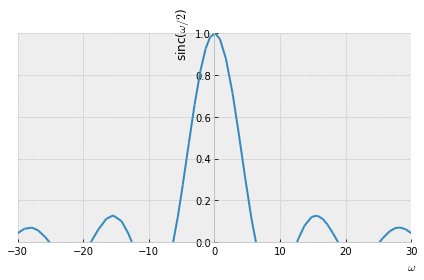

In [56]:
t, w = sym.symbols('t omega')
display(Latex(r'$F(\omega) = \frac{2 \sin (\frac{\omega}{2})}{\omega}$'))
FW = sym.sinc(w/2)
sym.plot(FW, (w, -30, 30), xlabel=r'$\omega$', ylabel=r'sinc($\omega / 2$)')

In [57]:
fx = inverse_fourier_transform(FW)
fx

⎧         1       
⎪1  for ────── > 1
⎪         │ 2│    
⎨       4⋅│t │    
⎪                 
⎪0    otherwise   
⎩                 

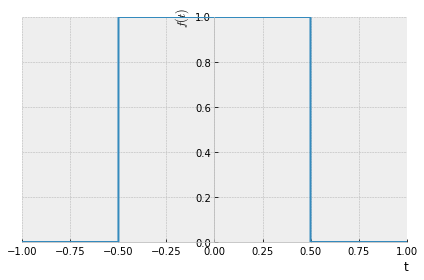

In [58]:
sym.plot(fx, (t,-1,1), ylabel=r'$f(t)$');

### 14. Transformada de Fourier: $ f(t) = \frac {|t|}{T} ... |t|< T  $
$  0 ... |t|> T $



$$
\mathcal{F} \{ \delta(t) \} = \int_{-\infty}^{\infty} f(t) e^{-j \omega t} dt = G_W(w)
$$

In [65]:
T0 = sym.symbols('T0')
FW14= sym.integrate((1/T0)*(t+T0)*sym.exp(-I*w*t), (t, -T0, 0)) + sym.integrate((-1/T0)*(t-T0)*sym.exp(-I*w*t), (t, 0, T0)) 
sym.pprint(FW14)


⎛⎧   -ⅈ⋅T₀⋅ω       2  2                       ⎞   ⎛⎧   ⅈ⋅T₀⋅ω       2  2      
⎜⎪  ℯ          ⅈ⋅T₀ ⋅ω  - T₀⋅ω        2  3    ⎟   ⎜⎪  ℯ         ⅈ⋅T₀ ⋅ω  + T₀⋅
⎜⎪- ──────── - ───────────────  for T₀ ⋅ω  ≠ 0⎟   ⎜⎪- ─────── + ──────────────
⎜⎪       2            2  3                    ⎟   ⎜⎪       2           2  3   
⎜⎨   T₀⋅ω           T₀ ⋅ω                     ⎟ + ⎜⎨   T₀⋅ω          T₀ ⋅ω    
⎜⎪                                            ⎟   ⎜⎪                          
⎜⎪             T₀                             ⎟   ⎜⎪            T₀            
⎜⎪             ──                 otherwise   ⎟   ⎜⎪            ──            
⎝⎩             2                              ⎠   ⎝⎩            2             

                 ⎞
ω        2  3    ⎟
─  for T₀ ⋅ω  ≠ 0⎟
                 ⎟
                 ⎟
                 ⎟
                 ⎟
     otherwise   ⎟
                 ⎠


In [61]:
sym.plot(sym.Abs(FW14), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')

ValueError: The same variable should be used in all univariate expressions being plotted.

### 15. Transformada de Fourier: $ f(t) = e^{-a|t|} $



$$
\mathcal{F} \{ \delta(t) \} = \int_{-\infty}^{\infty} e^{-a|t|} e^{-j \omega t} dt = \frac {2a}{a^2+w^2}
$$

In [88]:
FW15= sym.integrate(sym.exp(-a*t)*sym.exp(-I*w*t), (t, 0, sym.oo)) + sym.integrate(sym.exp(a*t)*sym.exp(-I*w*t), (t,-sym.oo, 0))
sym.pprint(FW15)


⎛⎧          -ⅈ                   ⎛                          π   │         π│  
⎜⎪   ──────────────────      for ⎜│arg(θ(polar_lift(t)))│ ≤ ─ ∧ │arg(ω) + ─│ <
⎜⎪     ⎛       -t     ⎞          ⎝                          2   │         2│  
⎜⎪     ⎜    ⅈ⋅ℯ  ⋅θ(t)⎟                                                       
⎜⎪   ω⋅⎜1 - ──────────⎟                                                       
⎜⎪     ⎝        ω     ⎠                                                       
⎜⎪                                                                            
⎜⎨∞                                                                           
⎜⎪⌠                                                                           
⎜⎪⎮              -t                                                           
⎜⎪⎮  -ⅈ⋅ω⋅t  -t⋅ℯ  ⋅θ(t)                                                      
⎜⎪⎮ ℯ      ⋅ℯ            dt                                                   
⎜⎪⌡                                                 

In [ ]:
sym.plot(sym.Abs(FW15), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')

### 16. Transformada de Fourier: $ f(t) = e^{-t^2/2\theta ^2} $



$$
\mathcal{F} \{ \delta(t) \} = \int_{-\infty}^{\infty} e^{-t^2/2\theta ^2} e^{-j \omega t} dt = \theta^2 (2\pi e^{-\theta w^2/2})^{1/2}
$$

In [91]:
t1 = sym.symbols('t1')
FW16= sym.integrate(sym.exp(-t**2/2*t1)*sym.exp(-I*w*t), (t, -sym.oo, sym.oo)) 
sym.pprint(FW16)


⎧                              2             2                                
⎪                            -ω            -ω                                 
⎪                            ────          ────                               
⎪      ⎛        ⎛ √2⋅ⅈ⋅ω ⎞⎞  2⋅t₁          2⋅t₁     ⎛ √2⋅ⅈ⋅ω ⎞                
⎪√2⋅√π⋅⎜2 - erfc⎜────────⎟⎟⋅ℯ       √2⋅√π⋅ℯ    ⋅erfc⎜────────⎟                
⎪      ⎜        ⎜    ____⎟⎟                         ⎜    ____⎟                
⎪      ⎝        ⎝2⋅╲╱ t₁ ⎠⎠                         ⎝2⋅╲╱ t₁ ⎠      ⎛⎛        
⎪──────────────────────────────── + ──────────────────────────  for ⎜⎜│arg(t₁)
⎪                ____                            ____               ⎝⎝        
⎪            2⋅╲╱ t₁                         2⋅╲╱ t₁                          
⎨                                                                             
⎪                   ∞                                                         
⎪                   ⌠                               

In [ ]:
sym.plot(sym.Abs(FW16), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')

# Transformada de Fourier para Señales Periodicas

In [ ]:
mu = sym.symbols('mu', integer=True)
t = sym.symbols('t', real=True)
T = 2
Tp = 5

def pulse_train(T, Tp):
    n = sym.symbols('n', integer=True)
    x0 = sym.Piecewise((0, t < 0), (1, t < T), (0, True))
    return sym.summation(x0.subs(t, t+n*Tp), (n, -10, 10))

print(f"Periodo = {Tp}")
print(f"Ancho del pulso = {T}")
import warnings
warnings.filterwarnings("ignore", module="sympy.plot")
sym.plot(pulse_train(T, Tp), (t, -5, 20), xlabel='$t$', ylabel='$f(t)$', adaptive=False)

In [ ]:
X_mu = sym.exp(-sym.I * mu * sym.pi * T/Tp) * T * sym.sinc(mu * sym.pi * T/Tp)
X_mu

In [ ]:
Fn = sym.lambdify(mu, sym.Abs(X_mu), 'numpy')

n = np.arange(-15, 15)
plt.stem(n*2*np.pi/Tp, Fn(n))
plt.xlabel('$\omega$')
plt.ylabel('$|F(\omega)|$');

- 9. Transformada de Fourier de $f(t) = \sin(\omega_0 t)$

In [80]:
FWSin = sym.integrate(sym.sin(t)*sym.exp(-(I)*w*t), (t, -(sym.oo), sym.oo))
FWSin

⎧         0            for │2⋅arg(ω) - π│ < π ∧ │2⋅arg(ω) + π│ < π
⎪                                                                 
⎪∞                                                                
⎪⌠                                                                
⎨⎮   -ⅈ⋅ω⋅t                                                       
⎪⎮  ℯ      ⋅sin(t) dt                   otherwise                 
⎪⌡                                                                
⎪-∞                                                               
⎩                                                                 

In [ ]:
sym.plot(sym.Abs(FWSin), (w, -30, 30), xlabel=r'$\omega$', ylabel=r'$|F(\omega)|$')

- 10. Transformada de Fourier de $f(t) = \cos(\omega_0 t)$

In [82]:
FWCos = sym.integrate(sym.cos(t)*sym.exp(-(I)*w*t), (t, -(sym.oo), sym.oo))
FWCos

⎧ ⅈ⋅ω         ⅈ                                                   
⎪────── + ──────────   for │2⋅arg(ω) - π│ < π ∧ │2⋅arg(ω) + π│ < π
⎪     2     ⎛    1 ⎞                                              
⎪1 - ω    ω⋅⎜1 - ──⎟                                              
⎪           ⎜     2⎟                                              
⎪           ⎝    ω ⎠                                              
⎨                                                                 
⎪∞                                                                
⎪⌠                                                                
⎪⎮   -ⅈ⋅ω⋅t                                                       
⎪⎮  ℯ      ⋅cos(t) dt                   otherwise                 
⎪⌡                                                                
⎩-∞                                                               

- 17. Si $f(t) = \sum_{k = -\infty}^{\infty} \delta (t - KT)$
Tomando T = 2

In [83]:
k= sym.symbols('k', real=True)
T = 2

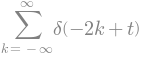

In [84]:
suma = sym.summation(sym.DiracDelta(t-(k*T)), (k, -sym.oo, sym.oo))
suma

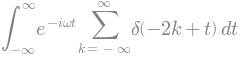

In [85]:
FWSum = sym.integrate(suma*sym.exp(-(I)*w*t), (t, -(sym.oo), sym.oo))
FWSum